In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
X = train.drop(['id', 'target'], axis=1).values
y = train['target'].values.astype(np.int8)
target_names = np.unique(y)
print('\nThere are %d unique target valuess in this dataset:' % (len(target_names)), target_names)


There are 2 unique target valuess in this dataset: [0 1]


In [9]:
n_comp = 20
# PCA
print('\nRunning PCA ...')
pca = PCA(n_components=n_comp, svd_solver='full', random_state=1001)
X_pca = pca.fit_transform(X)
print('Explained variance: %.4f' % pca.explained_variance_ratio_.sum())

print('Individual variance contributions:')
for j in range(n_comp):
    print(pca.explained_variance_ratio_[j])


Running PCA ...
Explained variance: 0.9944
Individual variance contributions:
0.9077327018849174
0.025423406321501665
0.011033728952072603
0.007026875356199522
0.006283416003140611
0.006119747729235827
0.005358647266808207
0.004532740198131304
0.0036293073197562293
0.002942622882647928
0.0023924601214410455
0.0017746433023195568
0.001666534907517576
0.0015118573722780135
0.0014828537818274451
0.0012950139999157134
0.0012052148134726142
0.0010727631061984715
0.0010395290634899552
0.0008415527677793357


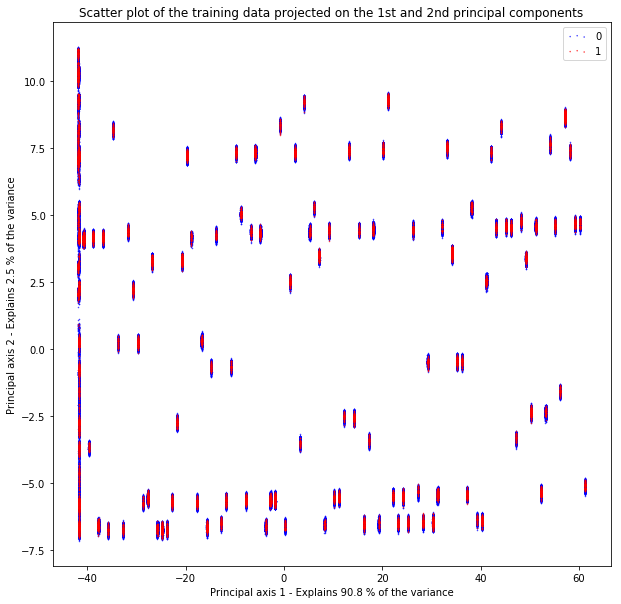

In [5]:
colors = ['blue', 'red']
plt.figure(1, figsize=(10,10))

for color, i, target_name in zip(colors, [0,1], target_names):
    plt.scatter(X_pca[y==i,0], X_pca[y==i,1],color=color, s=1, alpha=.8, label=target_name, marker='.')
    
plt.legend(loc='best', shadow=False, scatterpoints=3)
plt.title("Scatter plot of the training data projected on the 1st and 2nd principal components")
plt.xlabel("Principal axis 1 - Explains %.1f %% of the variance" % (pca.explained_variance_ratio_[0] * 100.0))
plt.ylabel("Principal axis 2 - Explains %.1f %% of the variance" % (pca.explained_variance_ratio_[1] * 100.0))
#plt.savefig('pca-porto-01.png', dpi=150)
plt.show()    

In [10]:
from sklearn.preprocessing import MinMaxScaler

def scale_data(X, scaler=None):
    if not scaler:
        scaler = MinMaxScaler(feature_range=(-1,1))
        scaler.fit(X)
    X = scaler.transform(X)
    return X,scaler

X = train.drop(['id', 'target'], axis = 1)
test.drop(['id'], axis = 1, inplace = True)
n_train = X.shape[0]
train_test = pd.concat((X, test)).reset_index(drop=True)
col_to_drop = X.columns[X.columns.str.endswith('_cat')]
col_to_dummify = X.columns[X.columns.str.endswith('_cat')].astype(str).tolist()

for col in col_to_dummify:
    dummy = pd.get_dummies(train_test[col].astype('category'))
    columns = dummy.columns.astype(str).tolist()
    columns = [col + '_' + w for w in columns]
    dummy.columns = columns
    train_test = pd.concat((train_test, dummy), axis=1)
    
train_test.drop(col_to_dummify, axis=1, inplace=True)
train_test_scaled, scaler = scale_data(train_test)
X = np.array(train_test_scaled[:n_train, :])
test = np.array(train_test_scaled[n_train:, :])
print('\n Shape of processed train data:', X.shape)
print('Shape of processed test data:', test.shape)

C:\Users\fujii\Anaconda3\envs\tesorflow-gpu\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)



 Shape of processed train data: (595212, 227)
Shape of processed test data: (892816, 227)



Running PCA ...
Explained variance: 0.6231
Individual variance contributions:
0.0740840701009587
0.06188682036309846
0.055953951179621556
0.042760761141847126
0.03590860488787086
0.034570725030749413
0.03146585005833506
0.02855820782927908
0.02551090289891824
0.02525068802950805
0.024582788625318073
0.024140032207526134
0.023864276919155752
0.023211406602292577
0.02103511418696042
0.020913502896378486
0.0200649774489894
0.01894788000727186
0.016250711840949564
0.014169058538981788


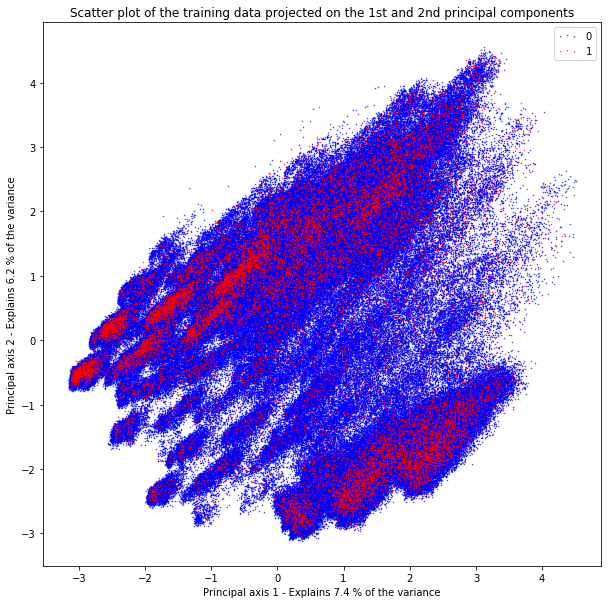

In [11]:
print('\nRunning PCA ...')
pca = PCA(n_components=n_comp, svd_solver='full', random_state=1001)
X_pca = pca.fit_transform(X)
print('Explained variance: %.4f' % pca.explained_variance_ratio_.sum())

print('Individual variance contributions:')
for j in range(n_comp):
    print(pca.explained_variance_ratio_[j])
    
plt.figure(1, figsize=(10,10))

for color, i, target_name in zip(colors, [0,1], target_names):
    plt.scatter(X_pca[y==i,0], X_pca[y==i,1],color=color, s=1, alpha=.8, label=target_name, marker='.')
    
plt.legend(loc='best', shadow=False, scatterpoints=3)
plt.title("Scatter plot of the training data projected on the 1st and 2nd principal components")
plt.xlabel("Principal axis 1 - Explains %.1f %% of the variance" % (pca.explained_variance_ratio_[0] * 100.0))
plt.ylabel("Principal axis 2 - Explains %.1f %% of the variance" % (pca.explained_variance_ratio_[1] * 100.0))
#plt.savefig('pca-porto-02.png', dpi=150)
plt.show()    